WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


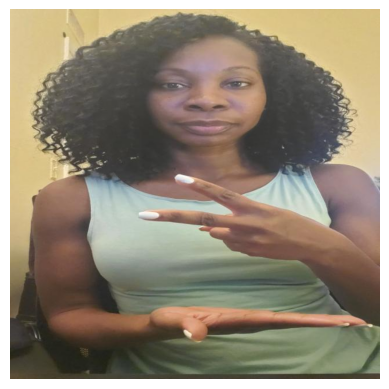

Loading ../models/shifumi_trained_yolo9t.torchscript for TorchScript inference...

image 1/1 /Users/sims/Documents/Simplon_DEV_IA/Projets/ShiFuMi_computerVision/simon/image_test.jpg: 640x640 1 Scissors, 338.5ms
Speed: 9.4ms preprocess, 338.5ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO('../models/shifumi_trained_yolo9t.torchscript')

image_path = 'image_test.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

results = model.predict(image_path)

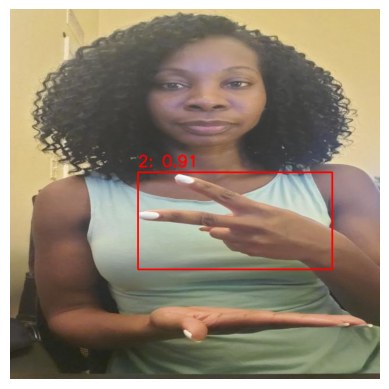

In [4]:
import cv2
import numpy as np

image_cv2 = cv2.imread(image_path)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        label = int(box.cls)
        confidence = float(box.conf)
        
        # Dessiner la boîte sur l'image
        cv2.rectangle(image_cv2, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image_cv2, f'{label}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.imshow(image_cv2)
plt.axis('off')
plt.show()

In [6]:
metrics = model.val(data='../Rock Paper Scissors SXSW.v14i.yolov9/data.yaml')
model.get_mAP

AttributeError: 'YOLO' object has no attribute 'get_mAP'